,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon & Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...
1,1010565,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...
2,1046438,Liar,Stephen Fry,0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...
3,1046713,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...
4,1046934,The Prime of Miss Jean Brodie,Muriel Spark,1999,Trafalgar Square Publishing,http://images.amazon.com/images/P/0001046934.0...,http://images.amazon.com/images/P/0001046934.0...,http://images.amazon.com/images/P/0001046934.0...


,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


,User_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


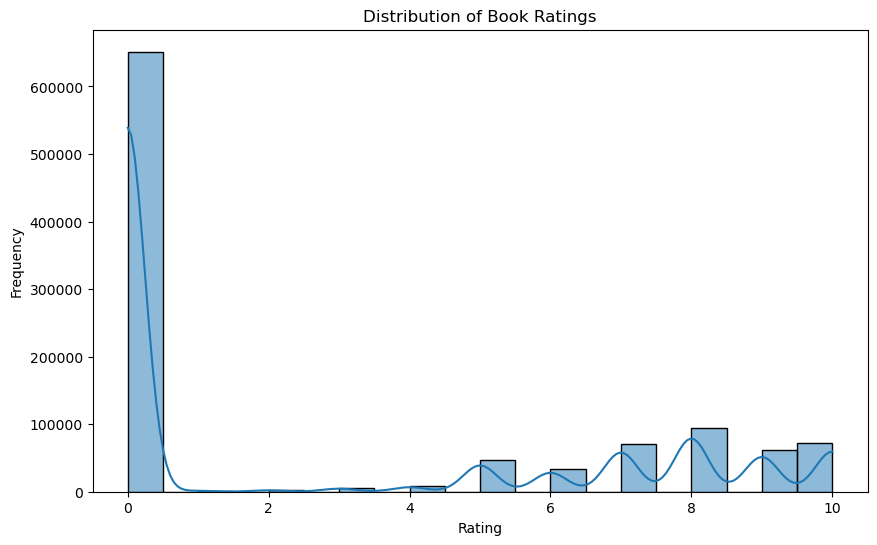

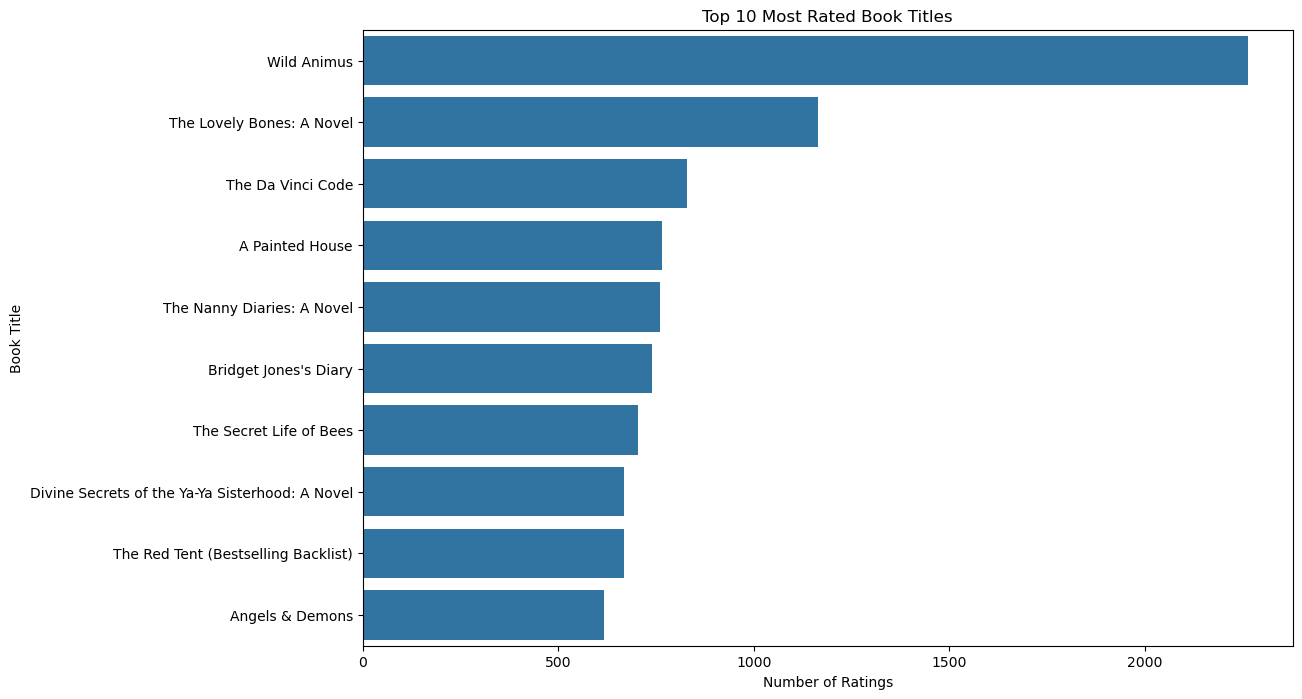

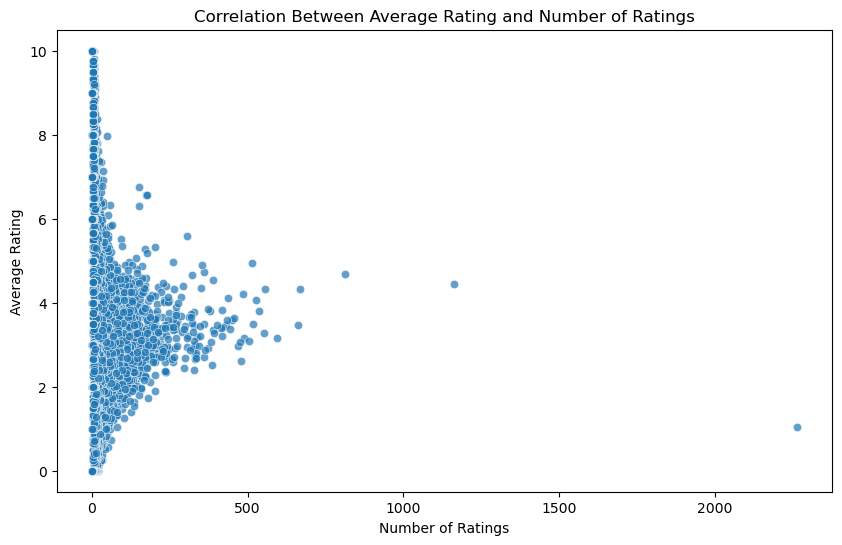

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets with specified dtype options
books_df = pd.read_csv('../data/Books.csv', dtype={'ISBN': str, 'Year_Of_Publication': str}, low_memory=False)
ratings_df = pd.read_csv('../data/Ratings.csv')
users_df = pd.read_csv('../data/Users.csv')

# Display the first few rows of each dataframe
display(books_df.head())
display(ratings_df.head())
display(users_df.head())

# Visualization 1: Distribution of Book Ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['Book_Rating'], bins=20, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Most Popular Book Titles
merged_df = pd.merge(ratings_df, books_df, on='ISBN')
ratings_count = merged_df['Book_Title'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=ratings_count.values, y=ratings_count.index)
plt.title('Top 10 Most Rated Book Titles')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.show()

# Visualization 3: Correlation Between Average Rating and Number of Ratings
book_stats = ratings_df.groupby('ISBN').agg({'Book_Rating': ['mean', 'count']}).reset_index()
book_stats.columns = ['ISBN', 'Avg_Rating', 'Num_Ratings']
book_stats = pd.merge(book_stats, books_df[['ISBN', 'Book_Title']], on='ISBN')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Num_Ratings', y='Avg_Rating', data=book_stats, alpha=0.7)
plt.title('Correlation Between Average Rating and Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()
